In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
METALresult_withoutTACERA = pd.read_csv("/exports/reum/CKe/generic-metal/RunMeta/METALresult1.TBL",sep='\s+')

In [9]:
METALresult_withoutTACERA

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,12:124805484:T:G,t,g,0.2021,0.2426,0.40500,?+++?-+??+
1,6:48620408:A:G,a,g,-0.1092,0.4710,0.81670,+?-?-?????
2,10:87086125:A:G,a,g,-0.1029,0.0491,0.03592,------++++
3,3:57508538:C:A,a,c,0.0208,0.0459,0.65120,--++-+-?+-
4,6:94925353:C:T,c,c,-0.0606,0.0463,0.19060,---++---+?
...,...,...,...,...,...,...,...
15121525,12:48453969:T:G,t,g,0.4963,0.5215,0.34120,??++?????-
15121526,11:13074670:A:G,a,a,-0.0099,0.0467,0.83200,-+-+-++-++
15121527,7:33306345:A:G,a,g,0.0778,0.0849,0.35900,-++-+-+---
15121528,20:25298297:G:A,a,g,-0.3053,1.0030,0.76080,??-???????


In [10]:
SNP = METALresult_withoutTACERA['MarkerName'].str.split(':',expand=True)[0]+":"+METALresult_withoutTACERA['MarkerName'].str.split(':',expand=True)[1]
METALresult_withoutTACERA['MarkerName'] = SNP

In [11]:
pd.merge(METALresult,METALresult_withoutTACERA,how='inner',left_on='MarkerName',right_on='MarkerName')

,MarkerName,Allele1_x,Allele2_x,Effect_x,StdErr_x,P-value_x,Direction_x,Allele1_y,Allele2_y,Effect_y,StdErr_y,P-value_y,Direction_y
0,5:29439275,t,t,-0.0131,0.0476,0.7834,-+++---+--?,t,t,-0.0131,0.0476,0.7834,-+++---+--
1,5:85928892,t,c,-0.0765,0.0921,0.4065,-++---+-+-?,t,c,-0.0765,0.0921,0.4065,-++---+-+-
2,11:107819621,a,c,-0.0795,0.5072,0.8755,??-????????,a,c,-0.0795,0.5072,0.8755,??-???????
3,14:36082010,t,c,-0.1770,1.4190,0.9007,??-????????,t,c,-0.1770,1.4190,0.9007,??-???????
4,2:170966953,t,c,0.0011,0.1957,0.9955,+?++-?-?-+-,t,c,0.0630,0.2006,0.7535,+?++-?-?-+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15121525,18:7302253,t,g,-0.4525,0.6364,0.4770,?--????????,t,g,-0.4525,0.6364,0.4770,?--???????
15121526,11:99622387,t,c,-0.0583,0.0585,0.3187,+-+-----++?,t,c,-0.0583,0.0585,0.3187,+-+-----++
15121527,22:19966042,a,g,-0.8324,1.4170,0.5569,????-??????,a,g,-0.8324,1.4170,0.5569,????-?????
15121528,4:104138439,a,g,-0.0133,0.1388,0.9236,+?---+--++?,a,g,-0.0133,0.1388,0.9236,+?---+--++


In [ ]:
#including tacera adds ~590080 snps
#maybe should not remove rows with ? in direction or decide on a criteria how many ? can be tolerated.
#weight of cohorts are dependent on size of samples

## New study on latest result with 12 cohorts

In [2]:
METALresult = pd.read_csv("/exports/reum/CKe/RunMeta/METALresult_refEIRA_A1corr_maf1.TBL",sep='\s+')

In [7]:
filtered=pd.read_csv("/exports/reum/CKe/RunMeta/METALresult_filtered.TBL",sep='\s+')

In [3]:
comparison = pd.read_csv("/exports/reum/CKe/compareA1.txt",sep='\t',index_col=0)

/home/cke/.conda/envs/CKe/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cke/.conda/envs/CKe/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
filtered

,MarkerName,BP,CHR,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,5:29439275,29439275,5,t,c,-0.0083,0.0450,0.85280,---++-++--?-
1,5:85928892,85928892,5,t,c,-0.1423,0.0921,0.12260,----+---+-??
2,2:170966953,170966953,2,t,c,0.0183,0.2006,0.92740,-+?++?+?-+??
3,10:128341232,128341232,10,t,c,-0.0070,0.0455,0.87790,+-?--+----??
4,3:62707519,62707519,3,t,c,0.0930,0.0949,0.32700,+++--++---?+
...,...,...,...,...,...,...,...,...,...
6830697,3:80436770,80436770,3,a,g,0.2546,0.1113,0.02212,+++-++++-+??
6830698,18:44156714,44156714,18,c,g,-0.0485,0.0564,0.38930,++-+-----+?-
6830699,5:95076854,95076854,5,a,g,0.0594,0.0864,0.49170,+---+-+--+??
6830700,11:99622387,99622387,11,t,c,-0.0378,0.0585,0.51810,-++-+-+-++??


In [4]:
METALresult

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,5:29439275,t,c,-0.0083,0.0450,0.8528,---++-++--?-
1,5:85928892,t,c,-0.1423,0.0921,0.1226,----+---+-??
2,2:170966953,t,c,0.0183,0.2006,0.9274,-+?++?+?-+??
3,10:128341232,t,c,-0.0070,0.0455,0.8779,+-?--+----??
4,3:62707519,t,c,0.0930,0.0949,0.3270,+++--++---?+
...,...,...,...,...,...,...,...
9634804,5:95076854,a,g,0.0594,0.0864,0.4917,+---+-+--+??
9634805,18:7302253,t,g,0.5104,0.7120,0.4734,??+?????????
9634806,11:99622387,t,c,-0.0378,0.0585,0.5181,-++-+-+-++??
9634807,4:104138439,a,g,0.1012,0.1388,0.4661,++?-+++-++??


In [6]:
comparison

,SNP,NMISS,A1_ACPA,A1_Madrid,A1_RAMS,A1_EIRA,A1_SERA,A1_EAC,A1_EARTHA,A1_Vienna,A1_PEAC,A1_TACERA,A1_Leeds,A1_EARTHB,Uniqueness
0,1:693731,3815.0,G,G,G,G,G,G,G,G,NaN,NaN,NaN,G,G
1,1:706368,586.0,G,NaN,G,G,G,G,NaN,G,NaN,NaN,NaN,NaN,G
2,1:729679,3699.0,C,C,C,C,C,C,C,C,NaN,NaN,C,C,C
3,1:730087,3977.0,C,C,C,C,C,C,C,C,C,NaN,NaN,NaN,C
4,1:731718,3889.0,C,C,C,C,C,C,C,C,NaN,NaN,NaN,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634804,22:50768583,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,T
9634805,22:50776892,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C
9634806,22:50776948,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C
9634807,22:50828411,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A


In [54]:
METALresult_nomiss = pd.read_csv("/exports/reum/CKe/generic-metal/RunMeta/METALresult_refEIRA_flipped_A1corr_maf1_noMiss.TBL",sep='\s+')
METALresult_nomiss #65k supported by all cohorts

,MarkerName,BP,CHR,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,7:67244641,67244641,7,a,g,-0.0206,0.0479,0.6668,--++--+-+--
1,12:86664739,86664739,12,a,c,-0.0041,0.0716,0.9541,+++-+-+++++
2,13:64631242,64631242,13,t,c,-0.0011,0.0447,0.9800,---++++++--
3,8:15430088,15430088,8,c,g,-0.0897,0.0477,0.0600,------+----
4,22:42437366,42437366,22,a,g,-0.0267,0.0476,0.5754,+-++--+-+-+
...,...,...,...,...,...,...,...,...,...
652066,6:18561044,18561044,6,c,g,-0.0003,0.0463,0.9946,---+++-++--
652067,3:80170413,80170413,3,c,g,0.0295,0.0454,0.5158,+-+++-+++-+
652068,12:76650915,76650915,12,a,g,-0.0751,0.0620,0.2259,----+-++---
652069,9:25637456,25637456,9,t,g,-0.1117,0.1329,0.4005,+-+--+-+-+-


In [9]:
(METALresult['Direction'].str.len()!=12).sum()
#all have 12 cohorts info in the col

0

In [10]:
suggestiveHits = METALresult[METALresult['P-value']<=1E-5]
len(suggestiveHits) #50, ? not removed

60

In [29]:
significant = METALresult[METALresult['P-value']<=5E-8]
len(significant) #? not removed

0

In [11]:
support = 12-METALresult['Direction'].str.count('\?')

In [12]:
METALresult['support']=support

In [14]:
suptoplot = METALresult.loc[:,['MarkerName','support']]#.iloc[:1000,:]
suptoplot.sort_values("support",inplace=True)

<AxesSubplot:ylabel='Frequency'>

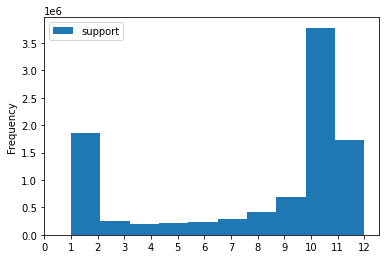

In [16]:
suptoplot.plot(kind="hist",x='MarkerName', y='support',sort_columns=True,xticks=range(13),xlabel='No of supports')

In [17]:
percentile = np.percentile(suptoplot.index,np.linspace(0,100,10),interpolation='nearest')
percentile

array([      0, 1070534, 2141068, 3211603, 4282137, 5352671, 6423205,
       7493740, 8564274, 9634808])

[Text(0, 0, '0%'),
 Text(1070534, 0, '10%'),
 Text(2141068, 0, '20%'),
 Text(3211603, 0, '30%'),
 Text(4282137, 0, '40%'),
 Text(5352671, 0, '50%'),
 Text(6423205, 0, '60%'),
 Text(7493740, 0, '70%'),
 Text(8564274, 0, '80%'),
 Text(9634808, 0, '90%')]

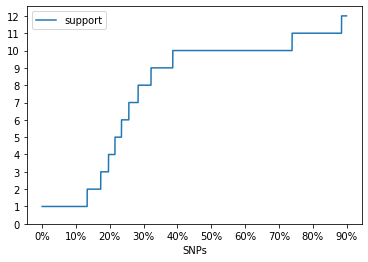

In [22]:
b = suptoplot.plot(kind="line",x='MarkerName', y='support',sort_columns=True,xlabel='SNPs')
b.set_xticks(percentile)
b.set_yticks(range(0,13))
b.set_xticklabels([str(i*10)+'%' for i in range(10)])

In [19]:
merge_temp = pd.merge(METALresult,comparison,left_on="MarkerName",right_on="SNP",how="left")
merge_temp

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction,support,SNP,NMISS,...,A1_EIRA,A1_SERA,A1_EAC,A1_EARTHA,A1_Vienna,A1_PEAC,A1_TACERA,A1_Leeds,A1_EARTHB,Uniqueness
0,5:29439275,t,c,-0.0083,0.0450,0.8528,---++-++--?-,11,5:29439275,4837.0,...,T,T,T,T,T,T,NaN,T,T,T
1,5:85928892,t,c,-0.1423,0.0921,0.1226,----+---+-??,10,5:85928892,4884.0,...,T,T,T,T,T,T,NaN,T,T,T
2,2:170966953,t,c,0.0183,0.2006,0.9274,-+?++?+?-+??,7,2:170966953,4543.0,...,C,C,C,C,NaN,NaN,C,C,C,C
3,10:128341232,t,c,-0.0070,0.0455,0.8779,+-?--+----??,9,10:128341232,4829.0,...,T,T,T,T,T,C,NaN,T,T,TC
4,3:62707519,t,c,0.0930,0.0949,0.3270,+++--++---?+,11,3:62707519,5089.0,...,T,T,T,T,T,T,T,T,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9634804,5:95076854,a,g,0.0594,0.0864,0.4917,+---+-+--+??,10,5:95076854,4214.0,...,G,G,G,G,G,G,NaN,NaN,G,G
9634805,18:7302253,t,g,0.5104,0.7120,0.4734,??+?????????,1,18:7302253,102.0,...,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN,NaN,T
9634806,11:99622387,t,c,-0.0378,0.0585,0.5181,-++-+-+-++??,10,11:99622387,4711.0,...,C,C,C,C,C,C,NaN,C,C,C
9634807,4:104138439,a,g,0.1012,0.1388,0.4661,++?-+++-++??,9,4:104138439,4227.0,...,A,A,A,A,A,NaN,NaN,NaN,A,A


In [20]:
METALresult

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction,support
0,5:29439275,t,c,-0.0083,0.0450,0.8528,---++-++--?-,11
1,5:85928892,t,c,-0.1423,0.0921,0.1226,----+---+-??,10
2,2:170966953,t,c,0.0183,0.2006,0.9274,-+?++?+?-+??,7
3,10:128341232,t,c,-0.0070,0.0455,0.8779,+-?--+----??,9
4,3:62707519,t,c,0.0930,0.0949,0.3270,+++--++---?+,11
...,...,...,...,...,...,...,...,...
9634804,5:95076854,a,g,0.0594,0.0864,0.4917,+---+-+--+??,10
9634805,18:7302253,t,g,0.5104,0.7120,0.4734,??+?????????,1
9634806,11:99622387,t,c,-0.0378,0.0585,0.5181,-++-+-+-++??,10
9634807,4:104138439,a,g,0.1012,0.1388,0.4661,++?-+++-++??,9


In [21]:
merge_temp['NMISS'].isnull().sum()
#all matched for nmiss

0

In [23]:
phenotoplot = merge_temp.loc[:,['MarkerName','NMISS']]
phenotoplot.sort_values("NMISS",inplace=True)
phenotoplot

,MarkerName,NMISS
4802177,9:44223764,5.0
8818676,9:44213995,5.0
2391243,1:145383571,6.0
8172780,9:44219144,7.0
2418908,21:14488199,7.0
...,...,...
6567081,13:77663138,5123.0
6096472,5:57408474,5123.0
5601573,1:225256842,5123.0
864882,10:35385130,5123.0


[Text(0, 0, '0%'),
 Text(1070534, 0, '10%'),
 Text(2141068, 0, '20%'),
 Text(3211603, 0, '30%'),
 Text(4282137, 0, '40%'),
 Text(5352671, 0, '50%'),
 Text(6423205, 0, '60%'),
 Text(7493740, 0, '70%'),
 Text(8564274, 0, '80%'),
 Text(9634808, 0, '90%')]

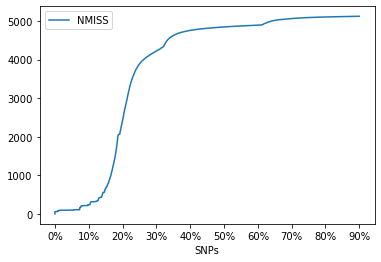

In [24]:
c = phenotoplot.plot(kind='line',x='MarkerName', y='NMISS',sort_columns=True,xlabel='SNPs')
percentile_pheno = np.percentile(phenotoplot.index,np.linspace(0,100,10),interpolation='nearest')
c.set_xticks(percentile_pheno)
c.set_xticklabels([str(i*10)+'%' for i in range(10)])

In [25]:
METALresult.iloc[merge_temp[merge_temp['NMISS']>=4000].index,:]

,MarkerName,Allele1,Allele2,Effect,StdErr,P-value,Direction,support
0,5:29439275,t,c,-0.0083,0.0450,0.85280,---++-++--?-,11
1,5:85928892,t,c,-0.1423,0.0921,0.12260,----+---+-??,10
2,2:170966953,t,c,0.0183,0.2006,0.92740,-+?++?+?-+??,7
3,10:128341232,t,c,-0.0070,0.0455,0.87790,+-?--+----??,9
4,3:62707519,t,c,0.0930,0.0949,0.32700,+++--++---?+,11
...,...,...,...,...,...,...,...,...
9634801,3:80436770,a,g,0.2546,0.1113,0.02212,+++-++++-+??,10
9634802,18:44156714,c,g,-0.0485,0.0564,0.38930,++-+-----+?-,11
9634804,5:95076854,a,g,0.0594,0.0864,0.49170,+---+-+--+??,10
9634806,11:99622387,t,c,-0.0378,0.0585,0.51810,-++-+-+-++??,10


In [30]:
filtered.sort_values("P-value")[:20]

,MarkerName,BP,CHR,Allele1,Allele2,Effect,StdErr,P-value,Direction
6434608,10:72721363,72721363,10,t,g,-0.3408,0.0635,8.140000e-08,----------?-
5814700,10:72717728,72717728,10,a,t,-0.3150,0.0624,4.467000e-07,---------+?-
1080024,10:72711119,72711119,10,a,g,-0.3338,0.0675,7.552000e-07,-------+--??
3163923,10:72720586,72720586,10,a,g,0.3226,0.0654,8.252000e-07,+-++++++++??
4648793,10:72723030,72723030,10,t,c,0.3228,0.0656,8.788000e-07,+-++++++++??
222716,10:72723867,72723867,10,a,g,0.3211,0.0658,1.072000e-06,+-++++++++??
2026596,2:48242946,48242946,2,t,c,0.3063,0.0630,1.168000e-06,+++++++-++?+
1536803,10:72713593,72713593,10,a,g,-0.3113,0.0641,1.191000e-06,-------+-+?-
3208311,3:21809913,21809913,3,t,c,0.3608,0.0749,1.460000e-06,+++++++++++?
3864182,10:72726064,72726064,10,a,g,-0.3231,0.0681,2.067000e-06,----------??
